In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# <b> LOAD & CONCAT DATA SET


In [2]:
# df_Arrhythmia_train = pd.read_csv("/kaggle/input/mitbih/mitbih_train.csv")
df_Arrhythmia_train = pd.read_csv("dataset/mitbih_train.csv")
df_Arrhythmia_train.columns = range(df_Arrhythmia_train.shape[1])
df_Arrhythmia_train.rename(columns={187: 'Labels'}, inplace=True)
df_Arrhythmia_train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Labels
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [3]:
df_Arrhythmia_test = pd.read_csv("dataset/mitbih_test.csv")
df_Arrhythmia_test.columns = range(df_Arrhythmia_test.shape[1])
df_Arrhythmia_test.rename(columns={187: 'Labels'}, inplace=True)
df_Arrhythmia_test

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Labels
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21886,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21887,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [4]:
df_mitbih = pd.concat([df_Arrhythmia_train, df_Arrhythmia_test], axis=0)
df_mitbih.rename(columns={187: 'Labels'}, inplace=True)
df_mitbih

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Labels
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21886,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21887,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


# <b> EDA FOR MITBIH DATASET

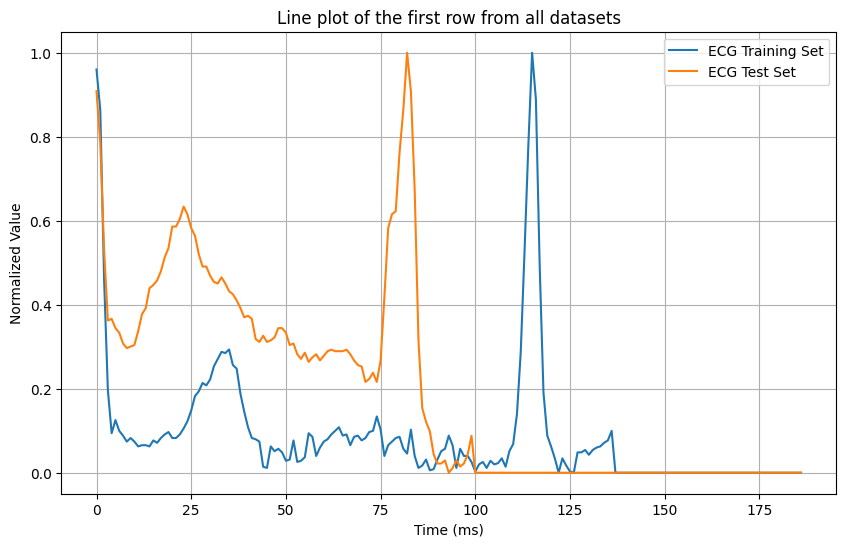

In [6]:
# Create a figure
plt.figure(figsize=(10, 6))

# ECG Training Set
sns.lineplot(data=df_Arrhythmia_train.iloc[0, :-1], label='ECG Training Set')

# ECG Test Set
sns.lineplot(data=df_Arrhythmia_test.iloc[0, :-1], label='ECG Test Set')

plt.title('Line plot of the first row from all datasets')
plt.xlabel('Time (ms)')
plt.ylabel('Normalized Value')

plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Check missing values
null = df_mitbih.isnull().sum()
print("Null values found in the dataset:", null.sum())
null

Null values found in the dataset: 0


0         0
1         0
2         0
3         0
4         0
         ..
183       0
184       0
185       0
186       0
Labels    0
Length: 188, dtype: int64

In [39]:
def evalDistribution(df):
    num_cols = df.columns[:5]
    if len(num_cols) == 0:
        print("No numerical columns found in the dataset.")
        return
    
    # Set up the figure
    fig, axes = plt.subplots(5, 2, figsize=(12, 20))
    fig.suptitle('Distribution Analysis of First 5 Numerical Columns', fontsize=16)
    
    for i, col in enumerate(num_cols):
        # Histogram
        sns.histplot(df[col], kde=True, ax=axes[i, 0], bins=30, color='skyblue')
        axes[i, 0].set_title(f'Histogram of {col}')
        
        # Boxplot
        sns.boxplot(x=df[col], ax=axes[i, 1], color='lightcoral')
        axes[i, 1].set_title(f'Boxplot of {col}')
    
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

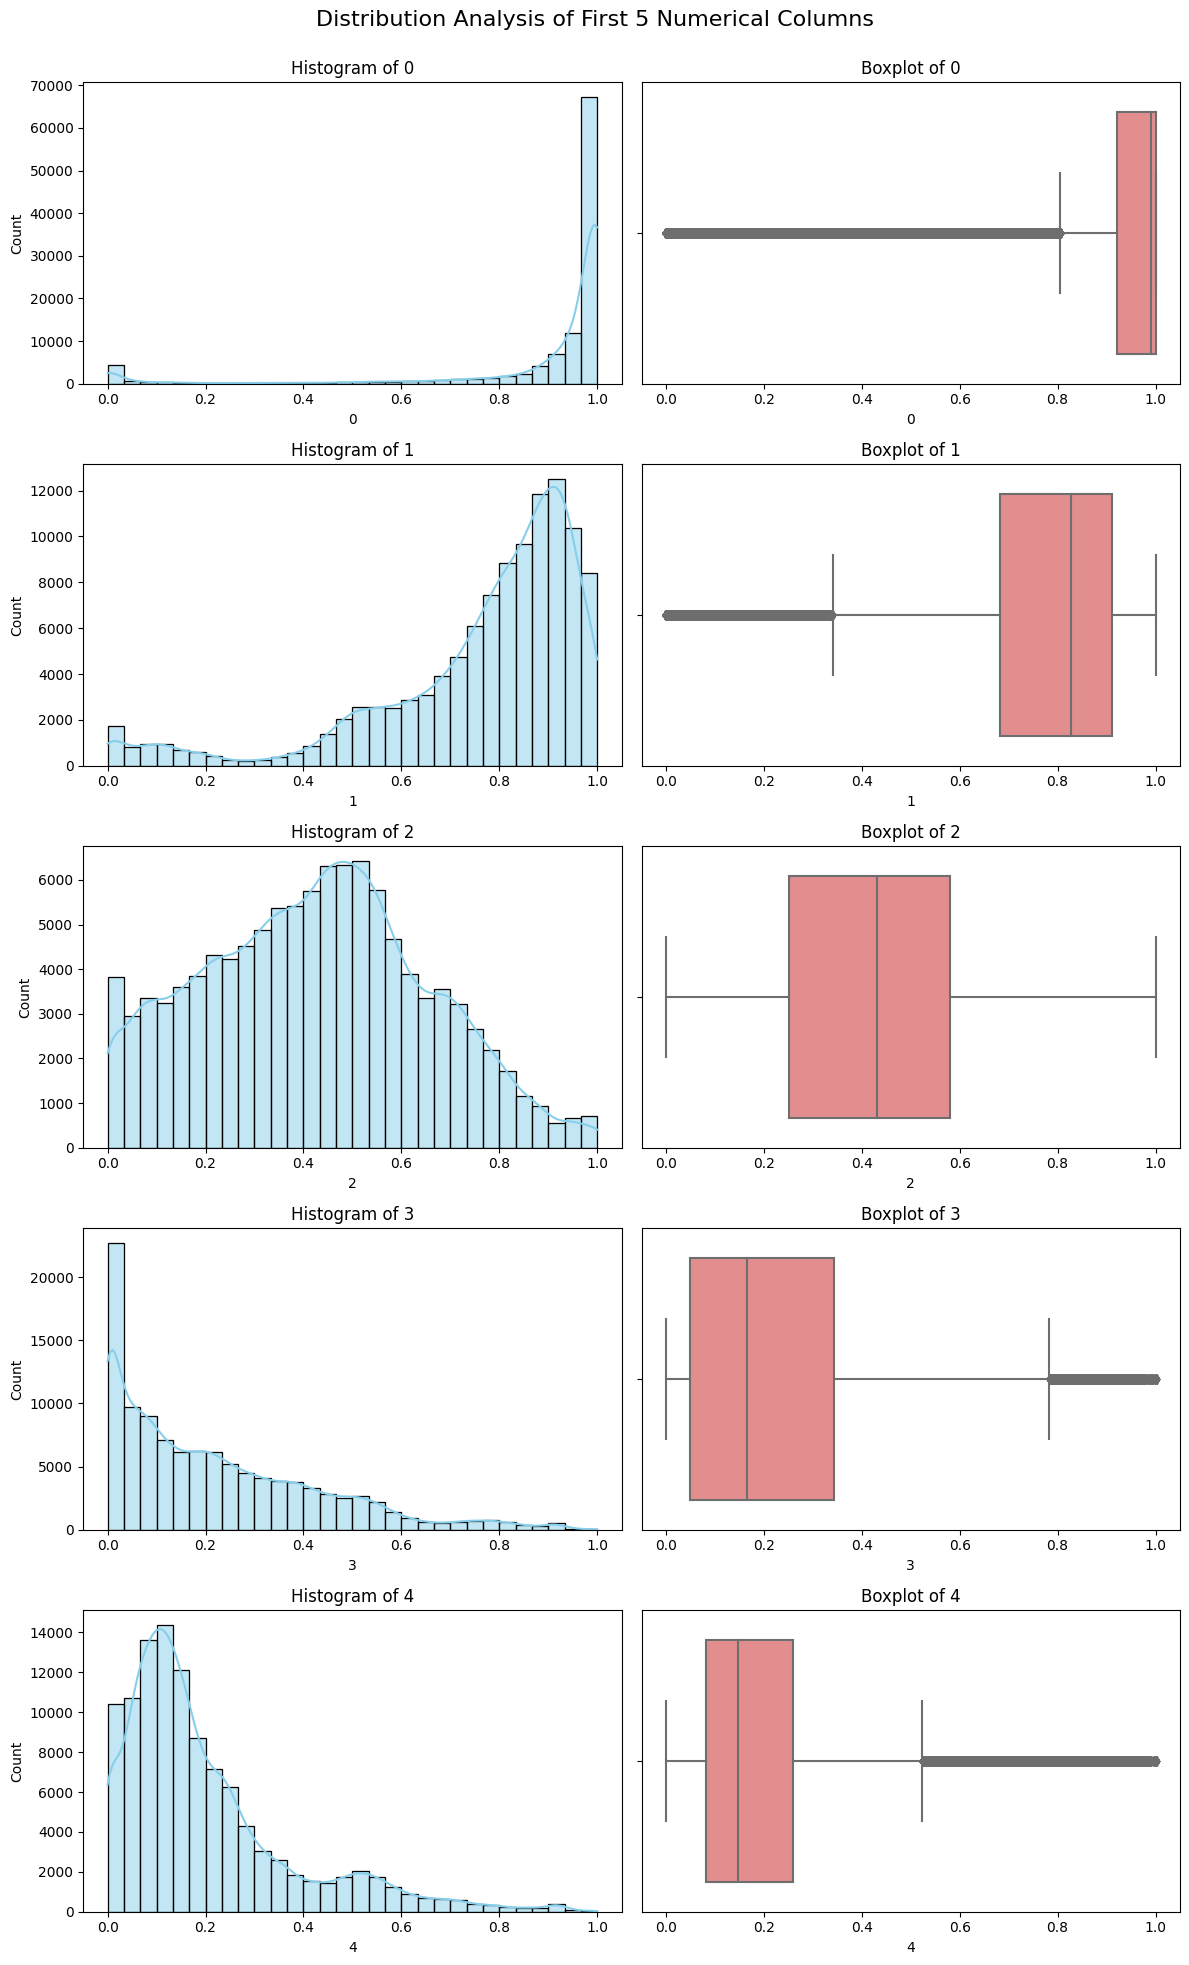

In [40]:
evalDistribution(df_mitbih)

In [41]:
# Value counts of labels
df_mitbih['Labels'].value_counts()


Labels
0.0    90587
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: count, dtype: int64

In [42]:
labels = []
for label in df_mitbih['Labels'].unique():
    labels.append(label)

labels

[0.0, 1.0, 2.0, 3.0, 4.0]

In [43]:
percentages = []
counts = []
for count in df_mitbih['Labels'].value_counts():
    counts.append(count)
    percentage = (count / len(df_mitbih))*100
    percentages.append(percentage)
    print(f"The percentage count of {count} is {percentage:.2f}%")

The percentage count of 90587 is 82.77%
The percentage count of 8039 is 7.35%
The percentage count of 7236 is 6.61%
The percentage count of 2779 is 2.54%
The percentage count of 803 is 0.73%


In [44]:
counts

[90587, 8039, 7236, 2779, 803]

In [45]:
percentages

[82.77018383831,
 7.345309016483316,
 6.61160045319981,
 2.5391981287233656,
 0.7337085632835058]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


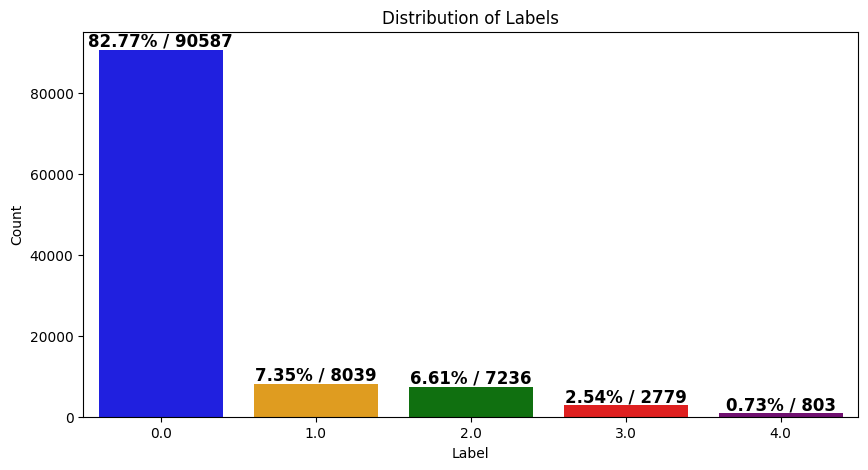

In [46]:
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot
plt.figure(figsize = (10,5))
ax = sns.barplot(x = labels, y = counts, palette = colors)

# Add count and percentage on top of each bar
for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(i, count + 1000, f"{percentage:.2f}% / {count}", ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Show plot
plt.show()


<b> Conclusion: The count/percentage in each labels in mitbih dataset appear some differences and this could make the overall data imbalance, which possibilly overfitting for the training model . Therefore, we need to resample all label

Train dataset before resampling

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


The percentage count of 72470 is 66.22%
The percentage count of 6431 is 5.88%
The percentage count of 5788 is 5.29%
The percentage count of 2223 is 2.03%
The percentage count of 641 is 0.59%


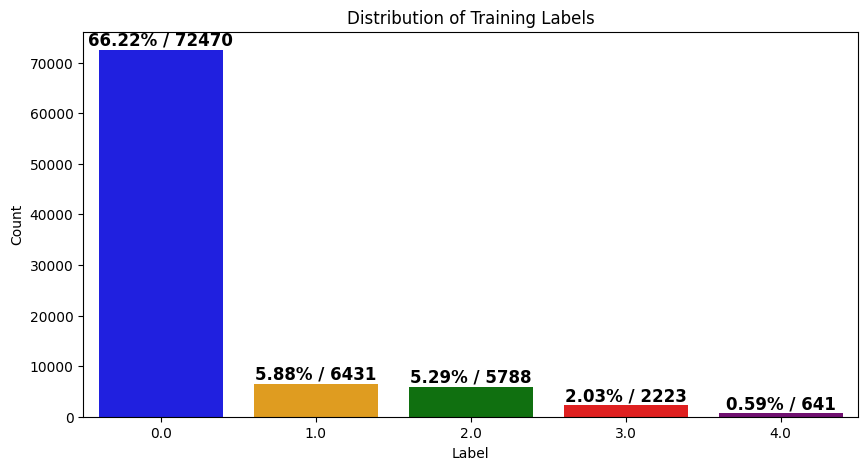

In [47]:
# Visualization of training dataset before resampling
labels_train = []
percentages_train = []
counts_train = []

for label in df_Arrhythmia_train['Labels'].unique():
    labels_train.append(label)

for count in df_Arrhythmia_train['Labels'].value_counts():
    counts_train.append(count)
    percentage = (count / len(df_mitbih))*100
    percentages_train.append(percentage)
    print(f"The percentage count of {count} is {percentage:.2f}%")

colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot
plt.figure(figsize = (10,5))
ax = sns.barplot(x = labels_train, y = counts_train, palette = colors)

# Add count and percentage on top of each bar
for i, (count, percentage) in enumerate(zip(counts_train, percentages_train)):
    ax.text(i, count + 1000, f"{percentage:.2f}% / {count}", ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Training Labels')

# Show plot
plt.show()

Train dataset after resampling: Hybrid Approach (Oversampling + Undersampling)

In [48]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

X = df_Arrhythmia_train.drop(columns=['Labels'])
y = df_Arrhythmia_train['Labels']
# smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
smote_tomek = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled)
df_resampled['Labels'] = y_resampled


<ipython-input-48-98213a0d0e43>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['Labels'] = y_resampled


In [49]:
df_resampled

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Labels
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362342,1.000000,0.507459,0.532308,0.550178,0.564608,0.534412,0.543396,0.525525,0.446202,0.301414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
362343,0.938188,0.892769,0.818008,0.758677,0.691745,0.606385,0.508468,0.413100,0.321219,0.252123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
362344,0.558531,0.539383,0.473178,0.479468,0.454231,0.454177,0.400559,0.368982,0.321622,0.220674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
362345,0.719778,0.617949,0.501694,0.376710,0.240049,0.132592,0.067756,0.031253,0.042311,0.074364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [50]:
df_resampled['Labels'].value_counts()


Labels
1.0    72470
3.0    72470
2.0    72470
4.0    72470
0.0    72467
Name: count, dtype: int64

The percentage count of 72470 is 20.00%
The percentage count of 72470 is 20.00%
The percentage count of 72470 is 20.00%
The percentage count of 72470 is 20.00%
The percentage count of 72467 is 20.00%


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


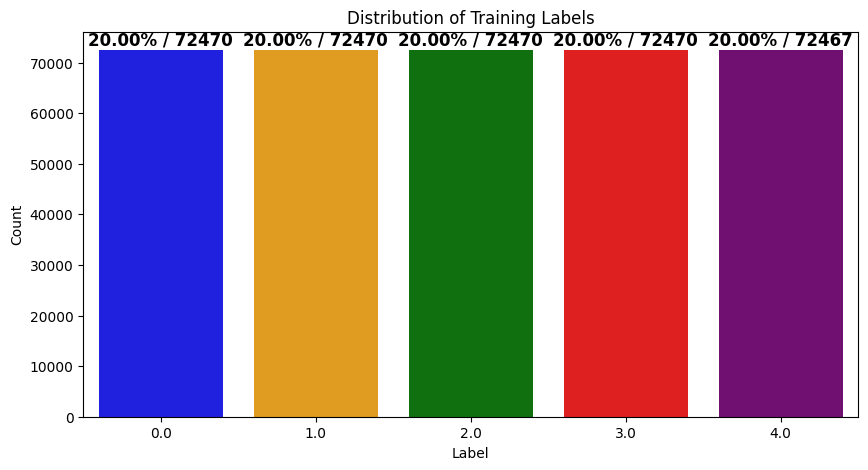

In [51]:
# Visualization of training dataset before resampling
labels_train_resampled = []
percentages_train_resampled = []
counts_train_resampled = []

for label in df_resampled['Labels'].unique():
    labels_train_resampled.append(label)

for count in df_resampled['Labels'].value_counts():
    counts_train_resampled.append(count)
    percentage = (count / len(df_resampled))*100
    percentages_train_resampled.append(percentage)
    print(f"The percentage count of {count} is {percentage:.2f}%")

colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot
plt.figure(figsize = (10,5))
ax = sns.barplot(x = labels_train_resampled, y = counts_train_resampled, palette = colors)

# Add count and percentage on top of each bar
for i, (count, percentage) in enumerate(zip(counts_train_resampled, percentages_train_resampled)):
    ax.text(i, count + 1000, f"{percentage:.2f}% / {count}", ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Training Labels')

# Show plot
plt.show()

Same process for test data


In [52]:
X = df_Arrhythmia_test.drop(columns=['Labels'])
y = df_Arrhythmia_test['Labels']

# smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
smote_tomek = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')) # 18117
X_resampled_test, y_resampled_test = smote_tomek.fit_resample(X, y)

df_resampled_test = pd.DataFrame(X_resampled_test)
df_resampled_test['Labels'] = y_resampled_test

<ipython-input-52-ceb9334af2a8>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled_test['Labels'] = y_resampled_test


In [53]:
df_resampled_test

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Labels
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90580,0.751088,0.501248,0.481716,0.452934,0.452295,0.434041,0.416490,0.368176,0.304610,0.215706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
90581,0.947467,0.503517,0.515449,0.515316,0.536569,0.501172,0.511275,0.465834,0.393802,0.264073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
90582,0.984589,0.554574,0.548971,0.535328,0.543429,0.527775,0.537338,0.471312,0.370996,0.218054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
90583,0.923344,0.872987,0.811366,0.754647,0.690744,0.606050,0.515831,0.424576,0.334260,0.275120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


The percentage count of 18117 is 20.00%
The percentage count of 18117 is 20.00%
The percentage count of 18117 is 20.00%
The percentage count of 18117 is 20.00%
The percentage count of 18117 is 20.00%


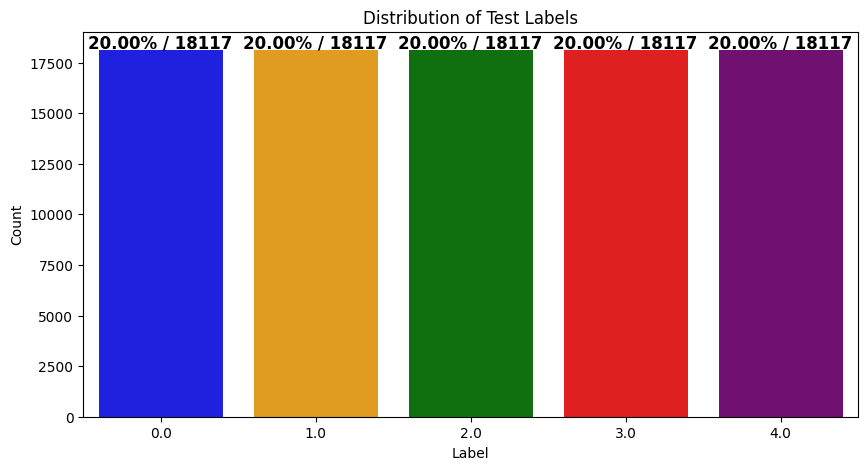

In [54]:
# Visualization of testing dataset before resampling
labels_test_resampled = []
percentages_test_resampled = []
counts_test_resampled = []

for label in df_resampled_test['Labels'].unique():
    labels_test_resampled.append(label)

for count in df_resampled_test['Labels'].value_counts():
    counts_test_resampled.append(count)
    percentage = (count / len(df_resampled_test))*100
    percentages_test_resampled.append(percentage)
    print(f"The percentage count of {count} is {percentage:.2f}%")

colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot
plt.figure(figsize = (10,5))
ax = sns.barplot(x = labels_test_resampled, y = counts_test_resampled, palette = colors)

# Add count and percentage on top of each bar
for i, (count, percentage) in enumerate(zip(counts_test_resampled, percentages_test_resampled)):
    ax.text(i, count + 100, f"{percentage:.2f}% / {count}", ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Test Labels')

# Show plot
plt.show()

# <b> Preprocessing

In [55]:
X_train = df_resampled.drop(columns=['Labels'])
y_train = df_resampled['Labels']

In [56]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362342,1.000000,0.507459,0.532308,0.550178,0.564608,0.534412,0.543396,0.525525,0.446202,0.301414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362343,0.938188,0.892769,0.818008,0.758677,0.691745,0.606385,0.508468,0.413100,0.321219,0.252123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362344,0.558531,0.539383,0.473178,0.479468,0.454231,0.454177,0.400559,0.368982,0.321622,0.220674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362345,0.719778,0.617949,0.501694,0.376710,0.240049,0.132592,0.067756,0.031253,0.042311,0.074364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
y_train

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
362342    4.0
362343    4.0
362344    4.0
362345    4.0
362346    4.0
Name: Labels, Length: 362347, dtype: float64

In [58]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_test = df_resampled_test.drop(columns=['Labels'])
y_test = df_resampled_test['Labels']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)
# Transform the valid data using the fitted scaler
X_valid_normalized = scaler.transform(X_valid)
# Transform the test data using the fitted scaler
X_test_normalized = scaler.transform(X_test)

print("Before Normalization:")
print(X_train.head(5))

print("After Normalization:")
print(X_train_normalized[:, 5])

Before Normalization:
             0         1         2         3         4         5         6    \
362295  1.000000  0.935275  0.869110  0.784479  0.688561  0.563059  0.440601   
323329  0.640418  0.519246  0.492289  0.458110  0.413147  0.362910  0.320185   
309279  1.000000  0.570610  0.583009  0.584203  0.572225  0.562520  0.576189   
90342   0.983353  0.810990  0.199245  0.070413  0.166390  0.233725  0.188130   
181896  0.988946  0.998828  0.956711  0.927982  0.911944  0.840502  0.682558   

             7         8         9    ...  177  178  179  180  181  182  183  \
362295  0.306666  0.223105  0.165182  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
323329  0.253889  0.148138  0.062226  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
309279  0.546960  0.471555  0.377590  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
90342   0.231881  0.288675  0.249713  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
181896  0.476792  0.303109  0.184575  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        184  185

In [59]:
df_resampled.shape

(362347, 188)

In [60]:
df_resampled_test.shape

(90585, 188)

In [61]:
X_train_normalized.shape

(289877, 187)

In [62]:
X_valid_normalized.shape

(72470, 187)

In [63]:
X_test_normalized.shape

(90585, 187)

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

def create_LSTM_model():
    RNN_model = Sequential([
        LSTM(64, input_shape=(187,1), return_sequences=True),
        Dropout(0.3),
        LSTM(64),
        Dense(128, activation='relu'),
        Dropout(0.1),  # Adding dropout for regularization
        Dense(5, activation='softmax')
    ])
    # Compile the model
    RNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return RNN_model


# Create the RNN model
RNN_model = create_LSTM_model()


# Print the model summary
RNN_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 187, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 187, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,885 (230.02 KB)

 Trainable params: 58,885 (230.02 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# Train the model
history_RNN = RNN_model.fit(X_train_normalized.reshape(-1, 187, 1), y_train, epochs=150, batch_size=128, validation_data=(X_valid_normalized, y_valid), callbacks=[early_stopping])


Epoch 1/150
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.4649 - loss: 1.2652 - val_accuracy: 0.7257 - val_loss: 0.7454
Epoch 4/150
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.9284 - loss: 0.1999 - val_accuracy: 0.9372 - val_loss: 0.1735
Epoch 9/150
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.9462 - loss: 0.1544 - val_accuracy: 0.9561 - val_loss: 0.1264
Epoch 10/150
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.9553 - loss: 0.1274 - val_accuracy: 0.9587 - val_loss: 0.1191
Epoch 11/150
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.9607 - loss: 0.1154 - val_accuracy: 0.9673 - val_loss: 0.0991
Epoch 12/150
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.9669 - loss: 0.0979 - val_accuracy: 0.9708 - val_loss: 0.0883
Epoch 13/150
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accuracy: 0.9703 - loss: 0.0859 - val_accuracy: 0.9721 - val_loss: 0.0806
Epoch 14/150
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - accur

In [66]:
# Evaluate the model
loss, accuracy = RNN_model.evaluate(X_valid_normalized, y_valid)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

2265/2265 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9953 - loss: 0.0183
Validation Loss: 0.017550142481923103
Validation Accuracy: 0.9953359961509705


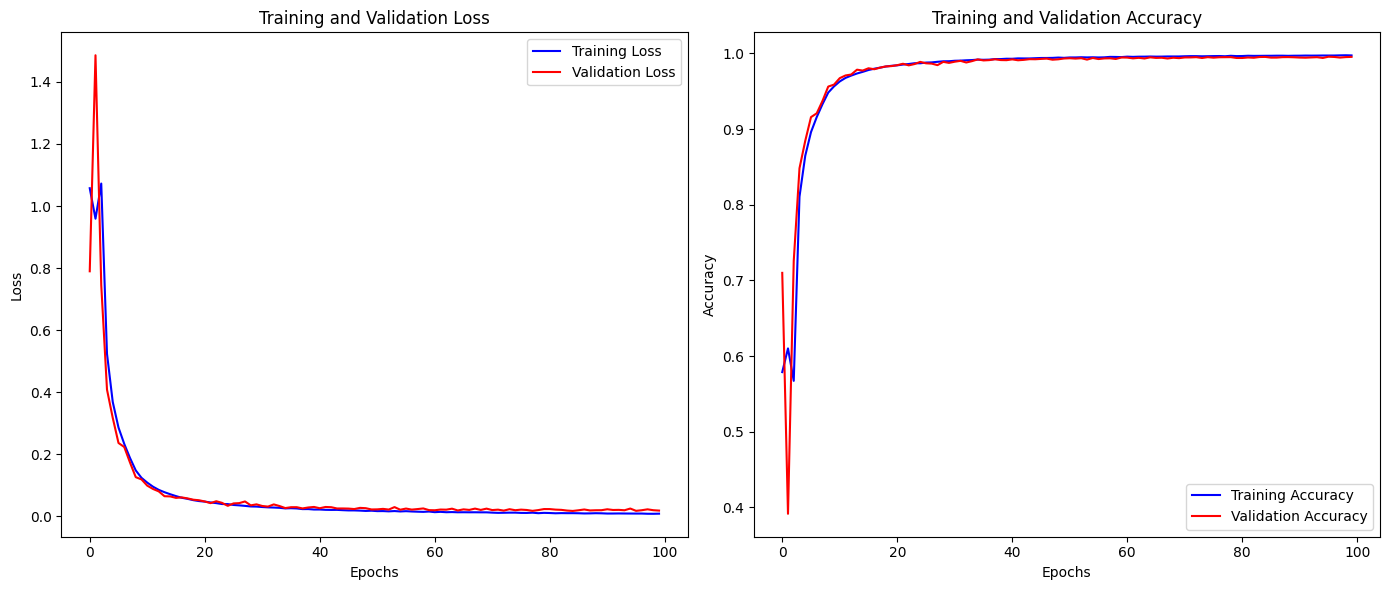

In [69]:
# Extract accuracy and loss data from the training history
history_dict = history_RNN.history

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the training and validation loss
ax[0].plot(history_dict['loss'], label='Training Loss', color='blue')
ax[0].plot(history_dict['val_loss'], label='Validation Loss', color='red')
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(history_dict['accuracy'], label='Training Accuracy', color='blue')
ax[1].plot(history_dict['val_accuracy'], label='Validation Accuracy', color='red')
ax[1].set_title('Training and Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [78]:
# Define the path where the weights will be saved
weights_save_path = '/kaggle/working/LSTM.weights.h5'

# Save the model weights
RNN_model.save_weights(weights_save_path)

print(f"Model weights saved to {weights_save_path}")


Model weights saved to /kaggle/working/LSTM.weights.h5


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


2831/2831 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step


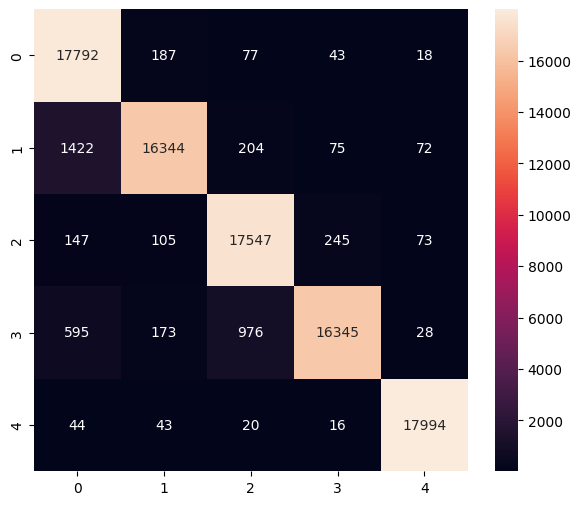

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93     18117
         1.0       0.97      0.90      0.93     18117
         2.0       0.93      0.97      0.95     18117
         3.0       0.98      0.90      0.94     18117
         4.0       0.99      0.99      0.99     18117

    accuracy                           0.95     90585
   macro avg       0.95      0.95      0.95     90585
weighted avg       0.95      0.95      0.95     90585



In [76]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

# Initialize OneHotEncoder
encoder_rnn = OneHotEncoder(sparse=False)

# Reshape y_test to a 2D array (required by OneHotEncoder)
y_test_reshaped_RNN = y_test.to_numpy().reshape(-1, 1)

# Fit and transform y_test to one-hot encoded format
y_test_onehot_RNN = encoder_rnn.fit_transform(y_test_reshaped_RNN)

# Convert one-hot encoded labels to single integer labels for y_test
y_test_classes_RNN = np.argmax(y_test_onehot_RNN, axis=1)


Y_pred = RNN_model.predict(X_test_normalized)
y_pred = np.argmax(Y_pred, axis=1)
print_confusion_matrix(y_test_classes_RNN, y_pred)